In [1]:
%load_ext autoreload

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import AFAI_library as afai
import AFAI_library_torch as afai_cuda
import AFAI_parallelGPU as afai_parallel
import torch
from concurrent.futures import ThreadPoolExecutor, as_completed
# from mpl_toolkits.mplot3d import Axes3D

In [3]:
%autoreload 2

In [4]:
period = 2
hopping = - np.pi/(2* period)
model_test = afai_parallel.tb_floquet_tbc_cuda(period, 1, hopping, 2,2)
model = afai_cuda.tb_floquet_tbc_cuda(period, 1, hopping, 2,2)
np.set_printoptions(linewidth=300)

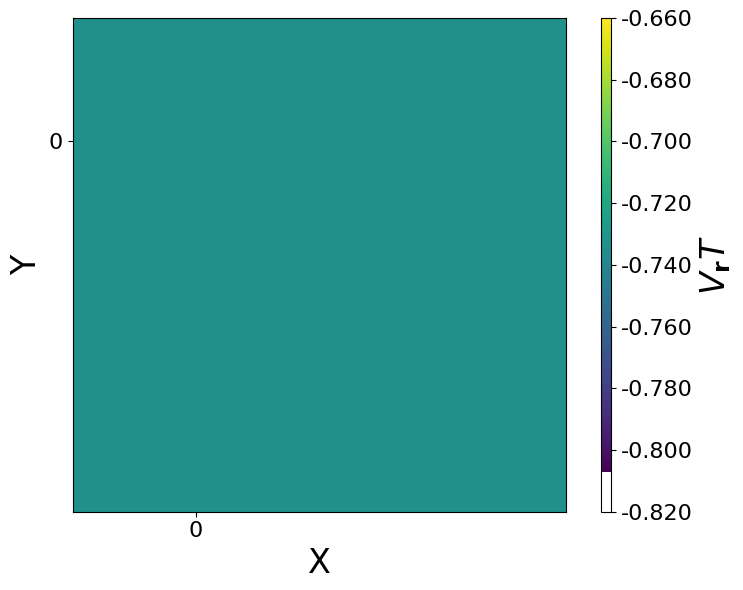

(tensor([[[-0.3669+0.j,  0.0000+0.j,  0.0000+0.j,  0.0000+0.j],
         [ 0.0000+0.j, -0.3669+0.j,  0.0000+0.j,  0.0000+0.j],
         [ 0.0000+0.j,  0.0000+0.j, -0.3669+0.j,  0.0000+0.j],
         [ 0.0000+0.j,  0.0000+0.j,  0.0000+0.j, -0.3669+0.j]],

        [[-0.7337+0.j,  0.0000+0.j,  0.0000+0.j,  0.0000+0.j],
         [ 0.0000+0.j, -0.7337+0.j,  0.0000+0.j,  0.0000+0.j],
         [ 0.0000+0.j,  0.0000+0.j, -0.7337+0.j,  0.0000+0.j],
         [ 0.0000+0.j,  0.0000+0.j,  0.0000+0.j, -0.7337+0.j]],

        [[-1.1006+0.j,  0.0000+0.j,  0.0000+0.j,  0.0000+0.j],
         [ 0.0000+0.j, -1.1006+0.j,  0.0000+0.j,  0.0000+0.j],
         [ 0.0000+0.j,  0.0000+0.j, -1.1006+0.j,  0.0000+0.j],
         [ 0.0000+0.j,  0.0000+0.j,  0.0000+0.j, -1.1006+0.j]]],
       device='cuda:0', dtype=torch.complex128), array([[-0.36687261, -0.36687261],
       [-0.36687261, -0.36687261]]))


In [36]:
vd_array = torch.tensor([1.0, 2.0, 3.0])  # Example array of vd values
H_aperiodic_batch = model_test.aperiodic_Honsite(vd = vd_array, contourplot=True)
print(H_aperiodic_batch)

c:\Users\11952\OneDrive\桌面\Project_MPhi\Preliminary_coding\Topo_Loco_QCs\Floquet\AFAI_parallelGPU.py:408: UserWarning: FixedFormatter should only be used together with FixedLocator


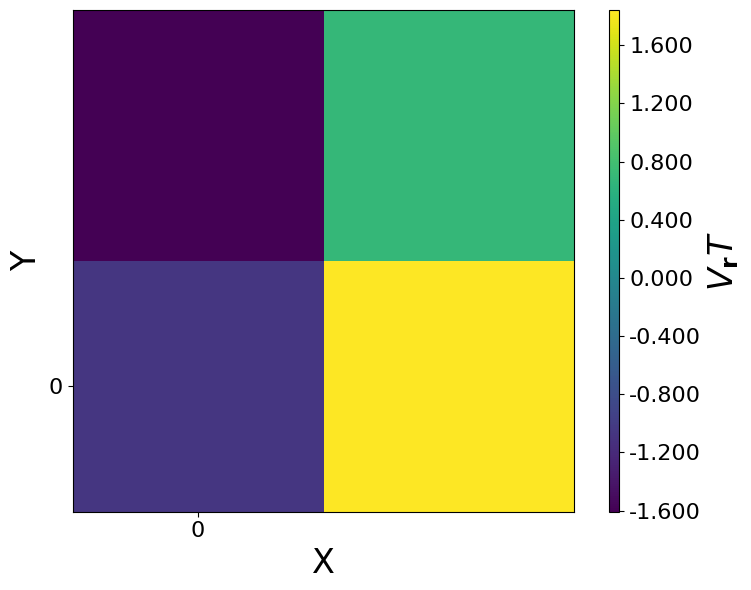

tensor([[[-0.5290,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.9211,  0.0000,  0.0000],
         [ 0.0000,  0.0000, -0.8037,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.3425]],

        [[-1.0580,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  1.8423,  0.0000,  0.0000],
         [ 0.0000,  0.0000, -1.6074,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.6850]],

        [[-1.5870,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  2.7634,  0.0000,  0.0000],
         [ 0.0000,  0.0000, -2.4112,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  1.0276]]], device='cuda:0')


In [37]:
vd_array = torch.tensor([1.0, 2.0, 3.0])  # Example array of vd values
H_aperiodic_batch = model_test.Hamiltonian_disorder(vd = vd_array, contourplot=True)
print(H_aperiodic_batch)

In [6]:
vd_array = torch.tensor([1.0, 2.0, 3.0], dtype=torch.float64)

In [7]:
U = model.time_evolution_1period(n=20, tbc = "x", vd = 2, rotation_angle=np.pi/4)

In [25]:
U = model_test.time_evolution_1period(n=20, tbc = "x", vd = vd_array, rotation_angle=np.pi/4)

20
20
20


In [44]:
model_test.time_evol_op(4, 0.001, vd = 2, tbc = "x", rotation_angle=np.pi/4)

Evolve one period
steps_per_segment 400
tensor([[[-0.4067+0.7860j, -0.0639-0.3540j,  0.2757+0.0644j, -0.0261-0.0811j],
         [-0.0380-0.3202j, -0.6942-0.5548j, -0.1271+0.1290j, -0.0082-0.2711j],
         [-0.2630-0.0679j, -0.0347+0.0786j,  0.0057-0.8677j,  0.1579-0.3754j],
         [-0.1156-0.1604j, -0.0082-0.2711j,  0.1258-0.3438j, -0.6471+0.5784j]]],
       device='cuda:0', dtype=torch.complex128)


tensor([[[-0.0889+0.8924j, -0.1354-0.2014j,  0.1396+0.1794j, -0.2741-0.1005j],
         [-0.1661-0.1092j, -0.9454+0.0757j, -0.2409+0.0464j,  0.0071+0.0282j],
         [-0.0932-0.1159j, -0.1795-0.0901j,  0.8467+0.2361j,  0.4049-0.0318j],
         [-0.1680-0.3254j, -0.0150+0.0333j,  0.3342+0.0620j, -0.8565+0.1239j]]],
       device='cuda:0', dtype=torch.complex128)

Evolve one period
steps_per_segment 40000
Evolve one period
steps_per_segment 34740
Evolve one period
steps_per_segment 30172
Evolve one period
steps_per_segment 26205
Evolve one period
steps_per_segment 22759
Evolve one period
steps_per_segment 19766
Evolve one period
steps_per_segment 17167
Evolve one period
steps_per_segment 14910
Evolve one period
steps_per_segment 12949
Evolve one period
steps_per_segment 11247
Evolve one period
steps_per_segment 9768
Evolve one period
steps_per_segment 8483
Evolve one period
steps_per_segment 7368
Evolve one period
steps_per_segment 6399
Evolve one period
steps_per_segment 5557
Evolve one period
steps_per_segment 4827
Evolve one period
steps_per_segment 4192
Evolve one period
steps_per_segment 3641
Evolve one period
steps_per_segment 3162
Evolve one period
steps_per_segment 2746
Evolve one period
steps_per_segment 2385
Evolve one period
steps_per_segment 2071
Evolve one period
steps_per_segment 1799
Evolve one period
steps_per_segment 1562
Evolve

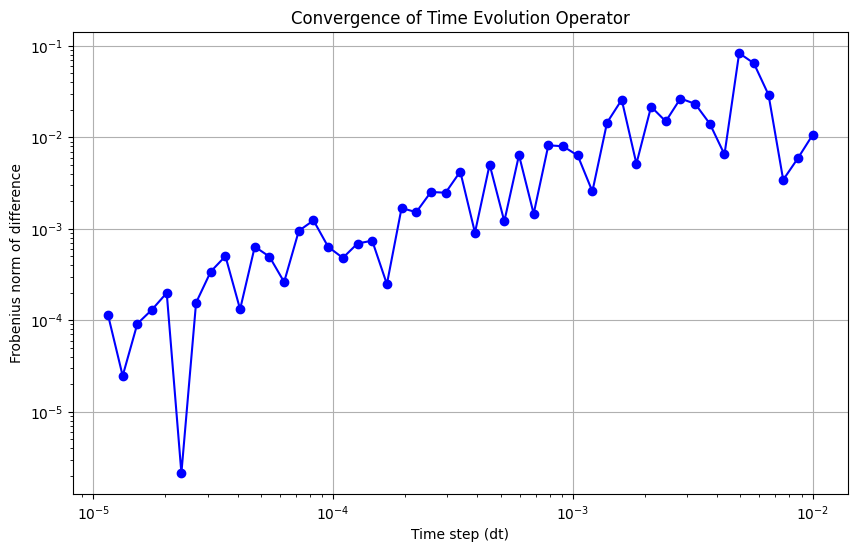

Smallest difference between consecutive dt values: 2.1324074782941364e-06


In [51]:
def convergence_test(t_final, vd, num_dt_values=50, min_dt=1e-5, max_dt=1e-2):
    # Parameters for the test
    tbc = "x"
    rotation_angle = np.pi/4
    theta_x = 0
    theta_y = 0

    # Generate a logarithmically spaced array of dt values
    dt_values = np.logspace(np.log10(min_dt), np.log10(max_dt), num_dt_values)

    # Store results
    results = []

    # Compute evolution for each dt
    for dt in dt_values:
        U = model_test.time_evol_op(t_final, dt, tbc, vd, rotation_angle, theta_x, theta_y)
        # Extract the first (and only) element if U is batched
        if U.dim() == 3:
            U = U[0]
        results.append(U.cpu().numpy())
    print(results)
    # Compute differences between consecutive results
    differences = []
    for i in range(1, len(results)):
        diff = np.linalg.norm(results[i] - results[i-1], ord='fro')
        differences.append(diff)
    print(differences)
    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.loglog(dt_values[1:], differences, 'bo-')
    plt.xlabel('Time step (dt)')
    plt.ylabel('Frobenius norm of difference')
    plt.title('Convergence of Time Evolution Operator')
    plt.grid(True)
    plt.show()

    # Return the smallest difference for reference
    return min(differences)

# Usage:
# Assuming you have your model instance as 'model'
t_final = 3* period  # or any other final time you want to test
vd = 1.0  # or any other vd value you want to test
min_difference = convergence_test(t_final, vd)
print(f"Smallest difference between consecutive dt values: {min_difference}")

In [52]:
nn = torch.arange(2 + 1)
energy = torch.tensor([1.0, 2.0, 3.0], dtype=torch.float64)
complex_exponent = 1j * energy * nn.unsqueeze(1) * 3

In [53]:
print(complex_exponent)

tensor([[0.+0.j, 0.+0.j, 0.+0.j],
        [0.+3.j, 0.+6.j, 0.+9.j],
        [0.+6.j, 0.+12.j, 0.+18.j]], dtype=torch.complex128)


In [56]:
torch.matrix_exp(torch.zeros(3,3))

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [59]:
t = 5 % 4
print(t)

1


In [72]:
def time_evolution_operator_pbc1(t, kx, ky):
        '''Time evolution operator for time 0 ≤ t ≤ T with a specified number of steps per T/5 segment'''
        '''Support not only scalar (kx, ky, t) pair
        but also batch processing for multiple (kx, ky, t) pairs: vectorization of kx, ky, and t: 1D tensors
        the output shape is then (N_kx, N_ky, N_t, nx*ny, nx*ny)'''
        
        # Determine if inputs are batched
        is_batch = isinstance(kx, torch.Tensor) and isinstance(ky, torch.Tensor) and kx.dim() + ky.dim() > 1

        if is_batch:
            batch_size = kx.shape[0]  # Total number of (kx, ky) pairs
            kx = kx.reshape(-1)  # Flatten kx to 1D
            print(kx)
            ky = ky.reshape(-1)  # Flatten ky to 1D
            print(ky)
            if isinstance(t, torch.Tensor) and t.dim() > 0:
                t = t.reshape(-1)
        else:
            batch_size = 1
        print(batch_size)
        # Reshape inputs for batch processing
        if isinstance(kx, torch.Tensor):
            kx = kx.view(batch_size, 1)
            print(kx)
        else:
            kx = torch.full((batch_size, 1), kx)
            print(kx)

        if isinstance(ky, torch.Tensor):
            ky = ky.view(batch_size, 1)
            print(ky)
        else:
            ky = torch.full((batch_size, 1), ky)
            print(ky)

        if isinstance(t, torch.Tensor):
            t = t.view(batch_size, 1)
            print(t)
        else:
            t = torch.full((batch_size, 1), t)
            print(t)
        return kx, ky, t

In [165]:
kx = torch.tensor([1.0, 2.0, 3.0], dtype=torch.float64, device='cuda:0')
ky = torch.tensor([1.0, 2.0, 3.0], dtype=torch.float64, device='cuda:0')
t = torch.tensor([1.0, 1.5, 2.0], dtype=torch.float64, device='cuda:0')

In [153]:
model_pest = afai_parallel.tb_floquet_pbc_cuda(period, 1, hopping, 2,2)

In [154]:
torch.cuda.empty_cache()

In [203]:
teo = model_pest.time_evolution_operator_pbc1(t, 100, kx, ky, 'xy')

tensor([[[[[True, True, True, True],
           [True, True, True, True],
           [True, True, True, True],
           [True, True, True, True]],

          [[True, True, True, True],
           [True, True, True, True],
           [True, True, True, True],
           [True, True, True, True]],

          [[True, True, True, True],
           [True, True, True, True],
           [True, True, True, True],
           [True, True, True, True]]],


         [[[True, True, True, True],
           [True, True, True, True],
           [True, True, True, True],
           [True, True, True, True]],

          [[True, True, True, True],
           [True, True, True, True],
           [True, True, True, True],
           [True, True, True, True]],

          [[True, True, True, True],
           [True, True, True, True],
           [True, True, True, True],
           [True, True, True, True]]],


         [[[True, True, True, True],
           [True, True, True, True],
           [True, True

In [193]:
print(teo)

tensor([[[[[-0.0250-0.8515j, -0.2755+0.0240j, -0.4013-0.1447j,  0.1126+0.0566j],
           [ 0.2755+0.0240j, -0.0250+0.8515j,  0.0132-0.1254j,  0.0950-0.4159j],
           [ 0.4013-0.1447j,  0.0132-0.1254j, -0.0250+0.8515j,  0.1690-0.2189j],
           [-0.0984+0.0788j, -0.0950-0.4159j, -0.1690-0.2189j, -0.0250-0.8515j]],

          [[-0.0250-0.8515j, -0.1326+0.2580j, -0.4013-0.1447j,  0.0866-0.0269j],
           [ 0.1326+0.2580j, -0.0250+0.8515j,  0.0694-0.0583j,  0.0950-0.4159j],
           [ 0.4013-0.1447j, -0.0116-0.0899j, -0.0250+0.8515j,  0.1795-0.2279j],
           [-0.0819+0.0388j, -0.0950-0.4159j, -0.1795-0.2279j, -0.0250-0.8515j]],

          [[-0.0250-0.8515j,  0.1416+0.2642j, -0.4013-0.1447j,  0.0022-0.0501j],
           [-0.1416+0.2642j, -0.0250+0.8515j,  0.0434+0.0252j,  0.0950-0.4159j],
           [ 0.4013-0.1447j,  0.0049-0.0499j, -0.0250+0.8515j,  0.1775-0.2416j],
           [-0.0394+0.0311j, -0.0950-0.4159j, -0.1775-0.2416j, -0.0250-0.8515j]]],


         [[[ 0.0150-

In [143]:
max_steps = 100
dt = 4
total_steps = np.array([20, 50, 100])
for step in range(max_steps):
    current_t = step * dt
    active = step < total_steps
    an = True & active
    print(step, an)
    if not active.any():
        break

0 [ True  True  True]
1 [ True  True  True]
2 [ True  True  True]
3 [ True  True  True]
4 [ True  True  True]
5 [ True  True  True]
6 [ True  True  True]
7 [ True  True  True]
8 [ True  True  True]
9 [ True  True  True]
10 [ True  True  True]
11 [ True  True  True]
12 [ True  True  True]
13 [ True  True  True]
14 [ True  True  True]
15 [ True  True  True]
16 [ True  True  True]
17 [ True  True  True]
18 [ True  True  True]
19 [ True  True  True]
20 [False  True  True]
21 [False  True  True]
22 [False  True  True]
23 [False  True  True]
24 [False  True  True]
25 [False  True  True]
26 [False  True  True]
27 [False  True  True]
28 [False  True  True]
29 [False  True  True]
30 [False  True  True]
31 [False  True  True]
32 [False  True  True]
33 [False  True  True]
34 [False  True  True]
35 [False  True  True]
36 [False  True  True]
37 [False  True  True]
38 [False  True  True]
39 [False  True  True]
40 [False  True  True]
41 [False  True  True]
42 [False  True  True]
43 [False  True  True

In [173]:
import torch

# Example tensor of shape [2, 3, 4, 5]
tensor = torch.randn(2, 3, 4, 4)
print(tensor)
# Shift the first dimension to the third one
# Resulting shape will be [3, 4, 2, 5]
new_tensor = tensor.permute(1, 0, 2, 3)
print(new_tensor)
print(new_tensor.shape)


tensor([[[[-0.1173,  0.2384, -1.2911, -0.9176],
          [ 2.3646, -1.7860,  0.0872, -0.9294],
          [ 0.7717, -0.8812,  0.6032,  0.0078],
          [-1.4350, -0.9342, -0.0496,  0.2589]],

         [[ 0.7389,  0.5581,  0.9558, -0.2550],
          [ 0.2892, -0.2593, -0.6292, -1.4328],
          [-0.4649,  1.1452, -1.3672,  0.2927],
          [ 0.9509,  1.0441,  0.6631, -0.6430]],

         [[-0.1099,  0.6703,  0.5443, -0.5199],
          [ 0.4841, -0.4684,  1.8675, -0.4358],
          [ 1.3608,  0.9188, -0.8268, -2.2279],
          [ 0.0720, -1.3873,  0.6725, -0.8331]]],


        [[[ 0.2249,  0.5926, -0.4454, -0.3706],
          [-0.3454, -0.0762, -0.8033, -0.0411],
          [-1.3693,  0.3645,  1.0305, -0.0378],
          [ 1.3418, -0.5075, -1.3511,  0.6404]],

         [[-0.4817, -1.0807,  1.1241,  0.0537],
          [ 0.0393, -1.0310, -0.8277, -1.1673],
          [-0.9628,  0.3426, -0.6224, -0.0250],
          [ 0.6336, -0.9852,  0.6890,  1.5781]],

         [[-1.1593, -0.4495,